In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from scipy.stats import zscore
import plotly.graph_objects as go

# Load your dataset
df = pd.read_excel('Crude Oil Prices.xlsx')

# Display the first few rows of the dataset
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [2]:
# Display basic information about the dataset
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


## Check for missing values

In [3]:

df.isnull().sum()


Date             0
Closing Value    7
dtype: int64

In [4]:
df.shape

(8223, 2)

In [5]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the time range of the dataset
print("Start Date:", df['Date'].min())
print("End Date:", df['Date'].max())


Start Date: 1986-01-02 00:00:00
End Date: 2018-07-09 00:00:00


## Plot closing values over time

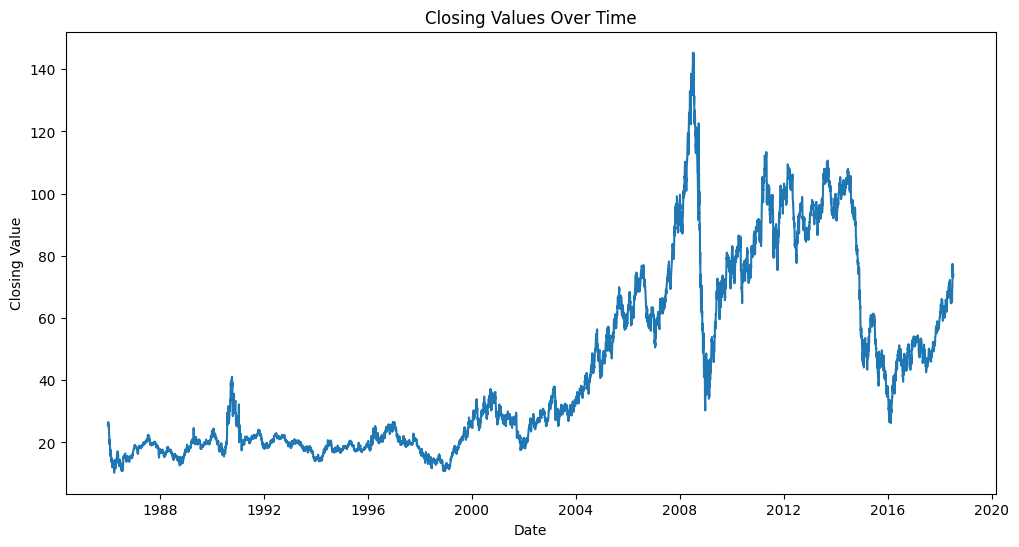

In [6]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Closing Value', data=df)
plt.title('Closing Values Over Time')
plt.show()


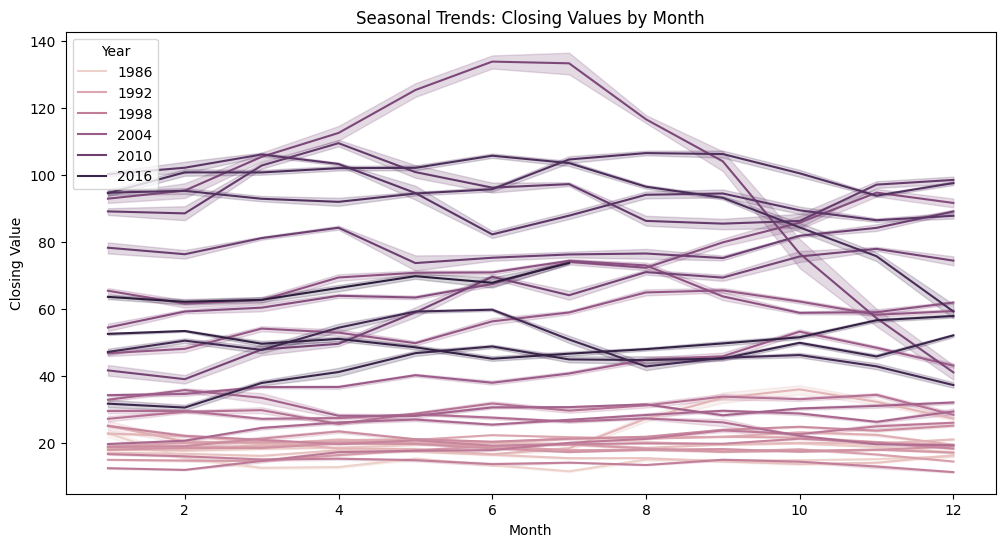

In [7]:
# Extract month and year from the date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Plot average closing values per month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Closing Value', hue='Year', data=df)
plt.title('Seasonal Trends: Closing Values by Month')
plt.show()

## Boxplot to identify outliers

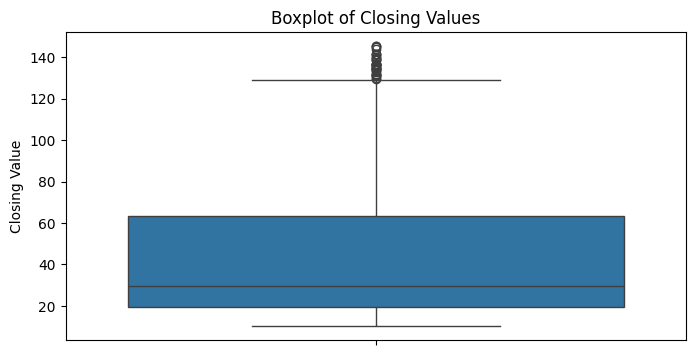

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['Closing Value'])
plt.title('Boxplot of Closing Values')
plt.show()


##  Visualize correlation matrix

<ipython-input-9-7f48d07d051d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


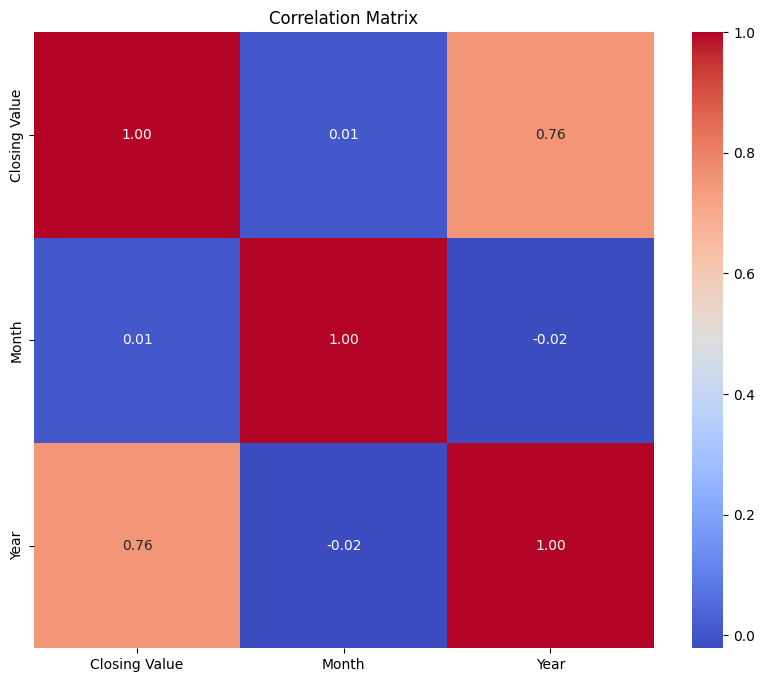

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Monthly Returns

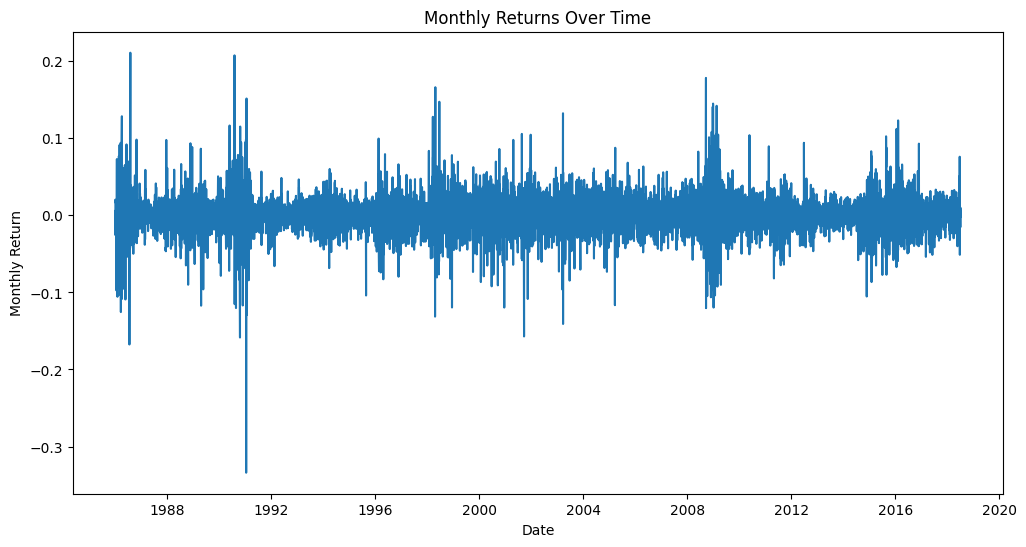

In [10]:
# Calculate monthly returns
df['Monthly Return'] = df['Closing Value'].pct_change()

# Plot monthly returns
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Monthly Return', data=df)
plt.title('Monthly Returns Over Time')
plt.show()


## Moving Average

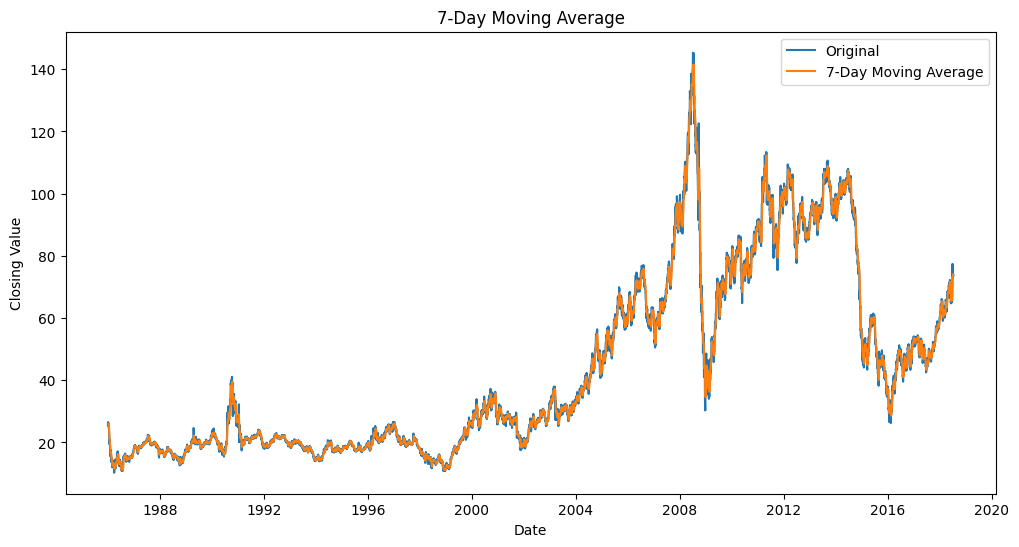

In [11]:
# Calculate moving average
df['MA_7'] = df['Closing Value'].rolling(window=7).mean()

# Plot moving average
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Closing Value', data=df, label='Original')
sns.lineplot(x='Date', y='MA_7', data=df, label='7-Day Moving Average')
plt.title('7-Day Moving Average')
plt.show()


## Plot volatility clustering

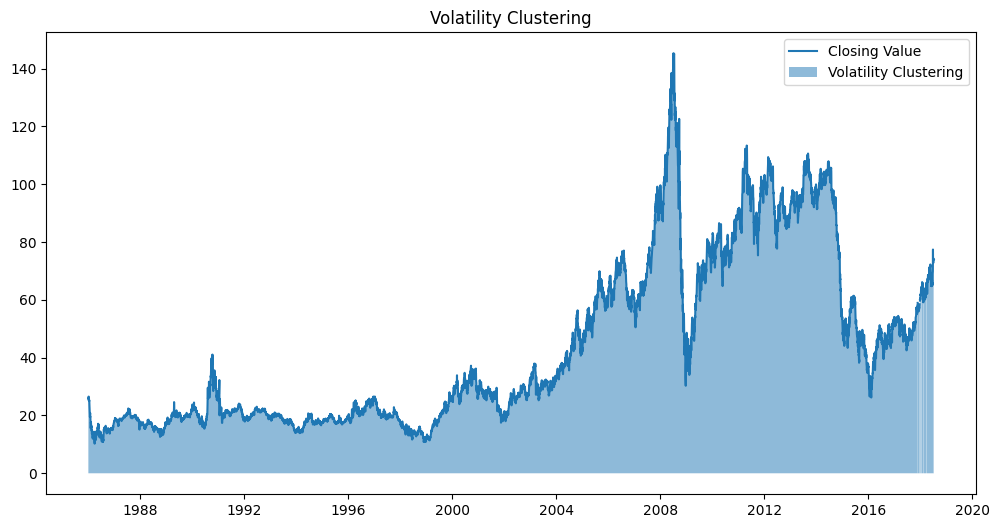

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing Value'], label='Closing Value')
plt.fill_between(df['Date'], df['Closing Value'], alpha=0.5, label='Volatility Clustering')
plt.title('Volatility Clustering')
plt.legend()
plt.show()


## ACF

<Figure size 1200x600 with 0 Axes>

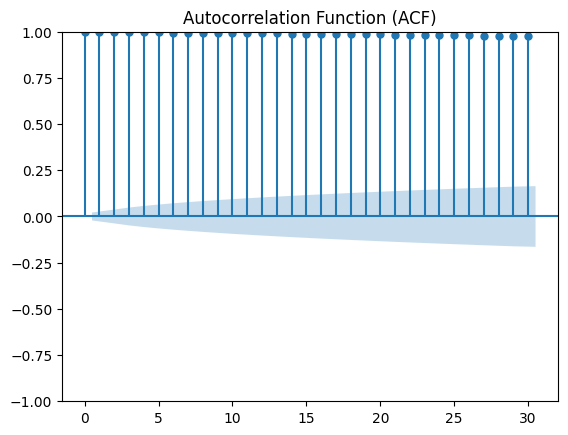

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column
df.sort_values(by='Date', inplace=True)

# Fill missing values in the 'Closing Value' column (replace with appropriate method)
df['Closing Value'].fillna(method='ffill', inplace=True)

# Plot autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['Closing Value'], lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()


## Time series into trend, seasonality, and residual

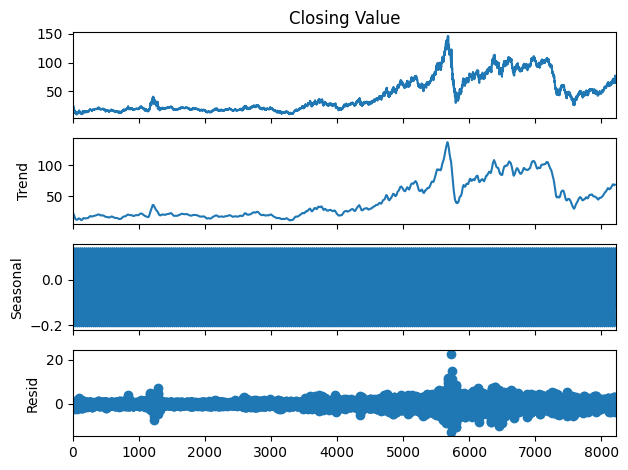

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column
df.sort_values(by='Date', inplace=True)

# Fill missing values in the 'Closing Value' column (replace with appropriate method)
df['Closing Value'].fillna(method='ffill', inplace=True)

# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(df['Closing Value'], model='additive', period=30)
result.plot()
plt.show()


## Lag Plot

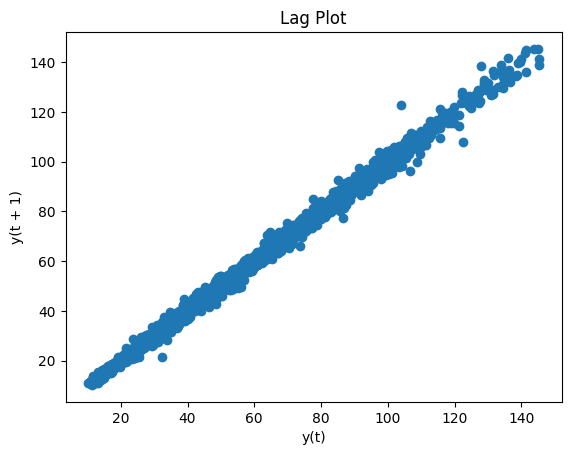

In [15]:
# Lag plot to check for randomness
lag_plot(df['Closing Value'])
plt.title('Lag Plot')
plt.show()


## Cumulative returns

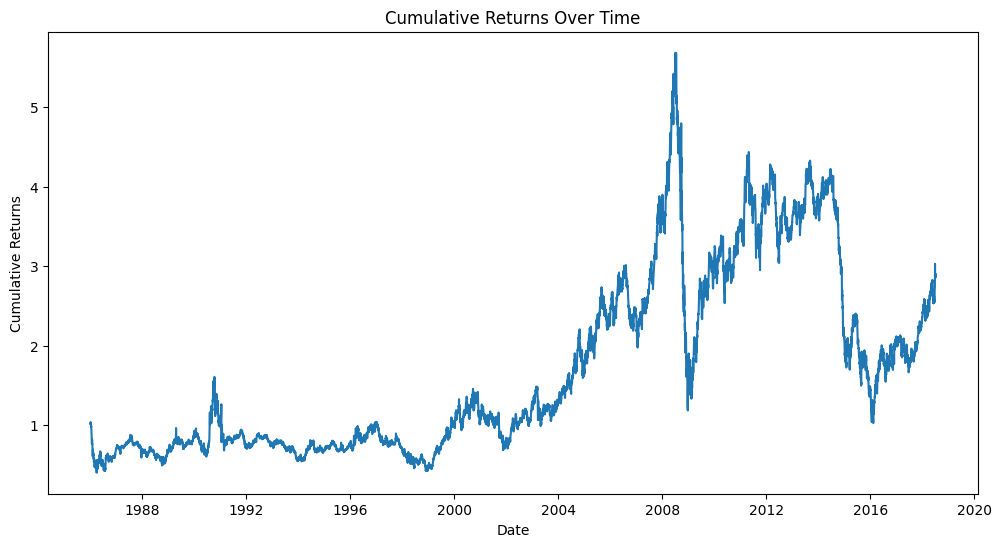

In [16]:
df['Cumulative Returns'] = (1 + df['Monthly Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cumulative Returns', data=df)
plt.title('Cumulative Returns Over Time')
plt.show()


## Distribution plot of Closing Values

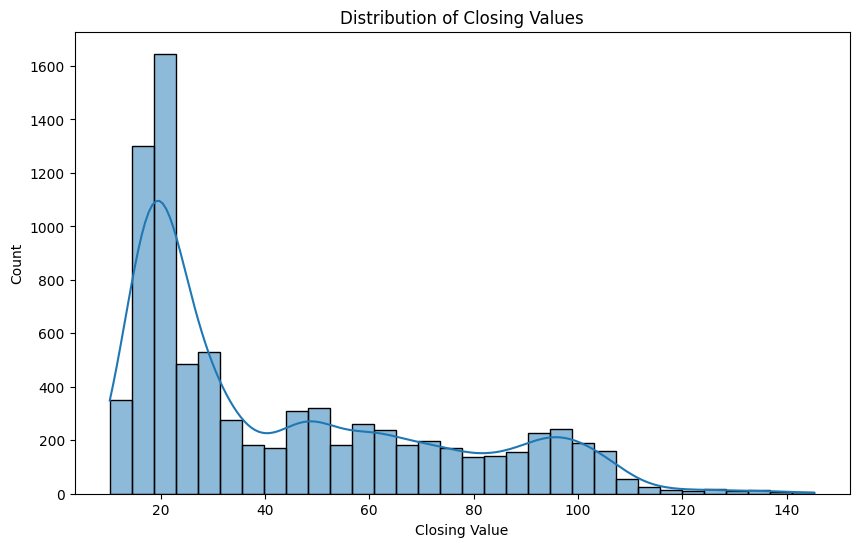

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Closing Value'], kde=True)
plt.title('Distribution of Closing Values')
plt.show()


##  Binary column for Up/Down days

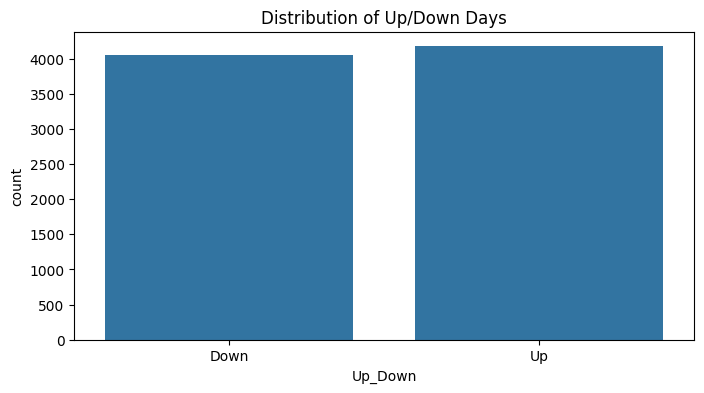

In [18]:
df['Up_Down'] = df['Monthly Return'].apply(lambda x: 'Up' if x > 0 else 'Down')

# Plot Up/Down days
plt.figure(figsize=(8, 4))
sns.countplot(x='Up_Down', data=df)
plt.title('Distribution of Up/Down Days')
plt.show()


## Identify extreme values using z-score

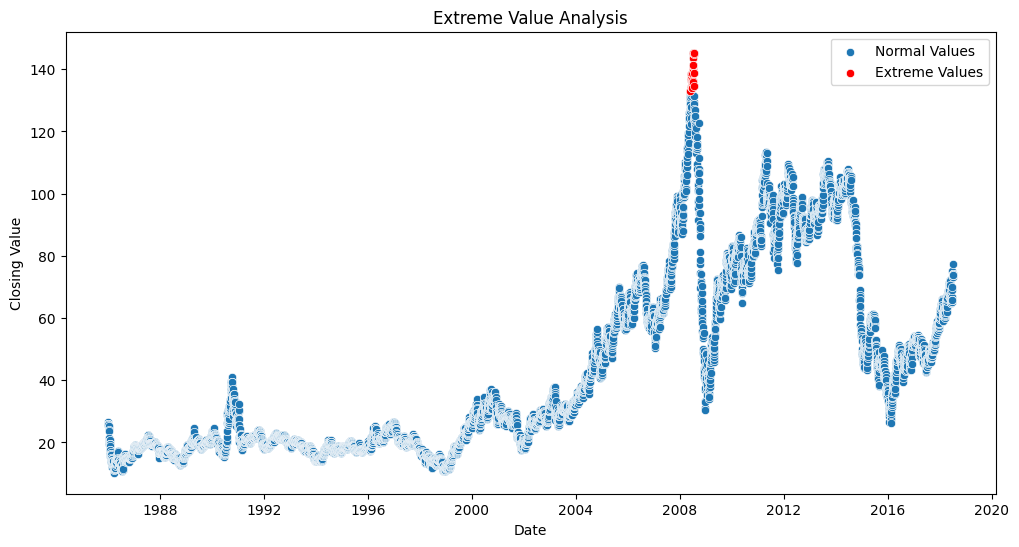

In [19]:
# Identify extreme values using z-score
from scipy.stats import zscore
df['Z_Score'] = zscore(df['Closing Value'])
extreme_values = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]

# Visualize extreme values
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Closing Value', data=df, label='Normal Values')
sns.scatterplot(x='Date', y='Closing Value', data=extreme_values, color='red', label='Extreme Values')
plt.title('Extreme Value Analysis')
plt.legend()
plt.show()


## Rolling volatility

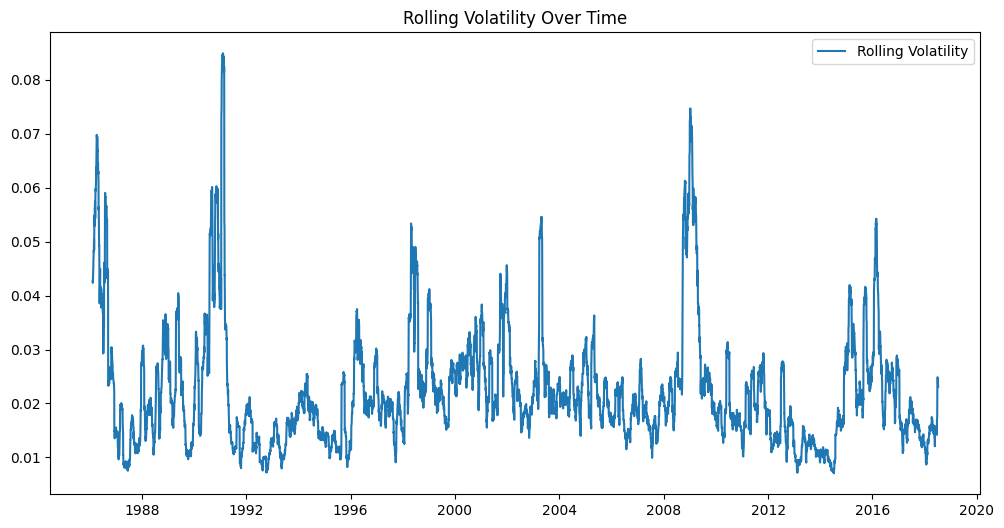

In [20]:
rolling_volatility = df['Closing Value'].pct_change().rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], rolling_volatility, label='Rolling Volatility')
plt.title('Rolling Volatility Over Time')
plt.legend()
plt.show()


## Candlestick chart

In [21]:
import plotly.graph_objects as go


import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=df['Date'], y=df['Closing Value'], mode='lines'))

# Update layout
fig.update_layout(title='Oil Price Over Time',
                  xaxis_title='Date',
                  yaxis_title='Closing Value')

# Show the plot
fig.show()


## Exponential moving average

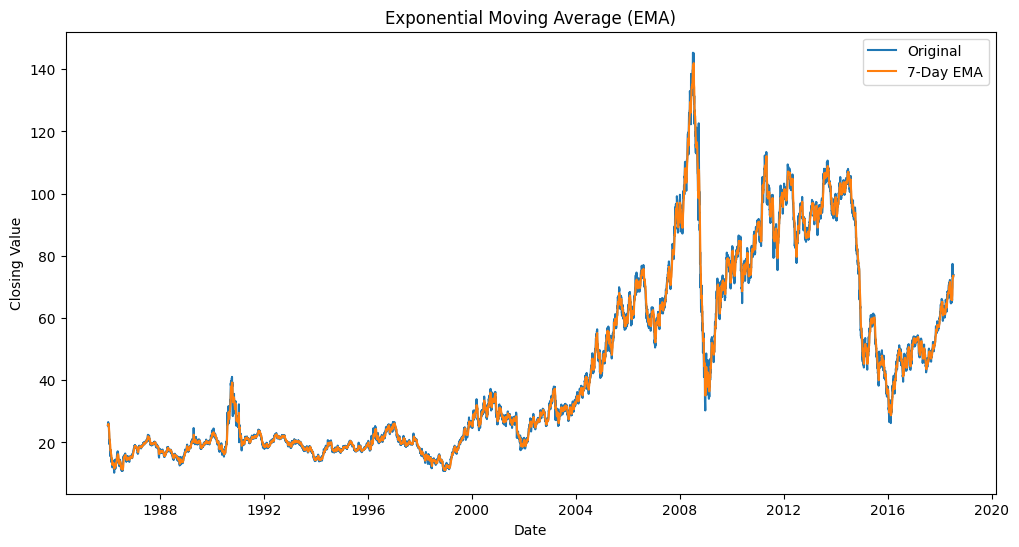

In [22]:
df['EMA_7'] = df['Closing Value'].ewm(span=7, adjust=False).mean()

# Plot EMA
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Closing Value', data=df, label='Original')
sns.lineplot(x='Date', y='EMA_7', data=df, label='7-Day EMA')
plt.title('Exponential Moving Average (EMA)')
plt.show()


## Residual Analysis

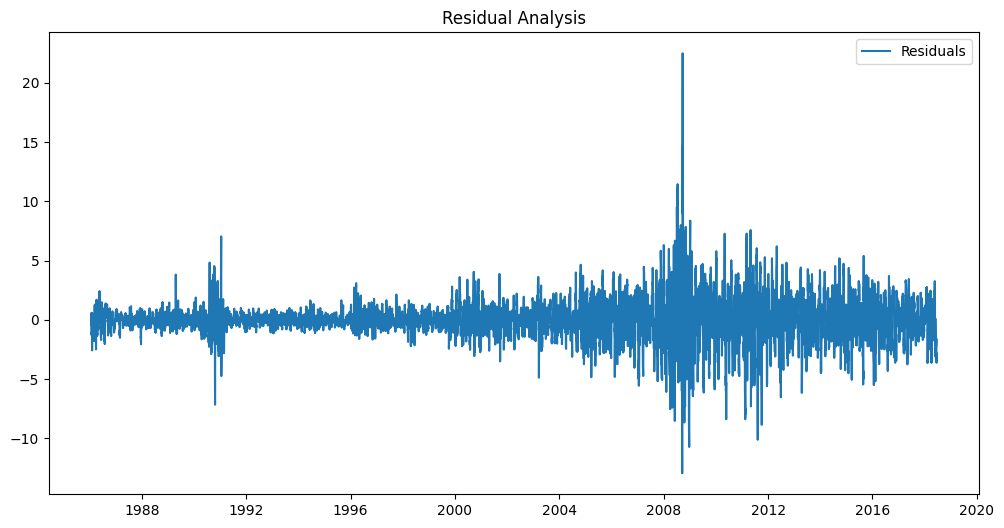

In [23]:
residuals = df['Closing Value'] - result.trend - result.seasonal

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], residuals, label='Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()


## Heatmap of closing values

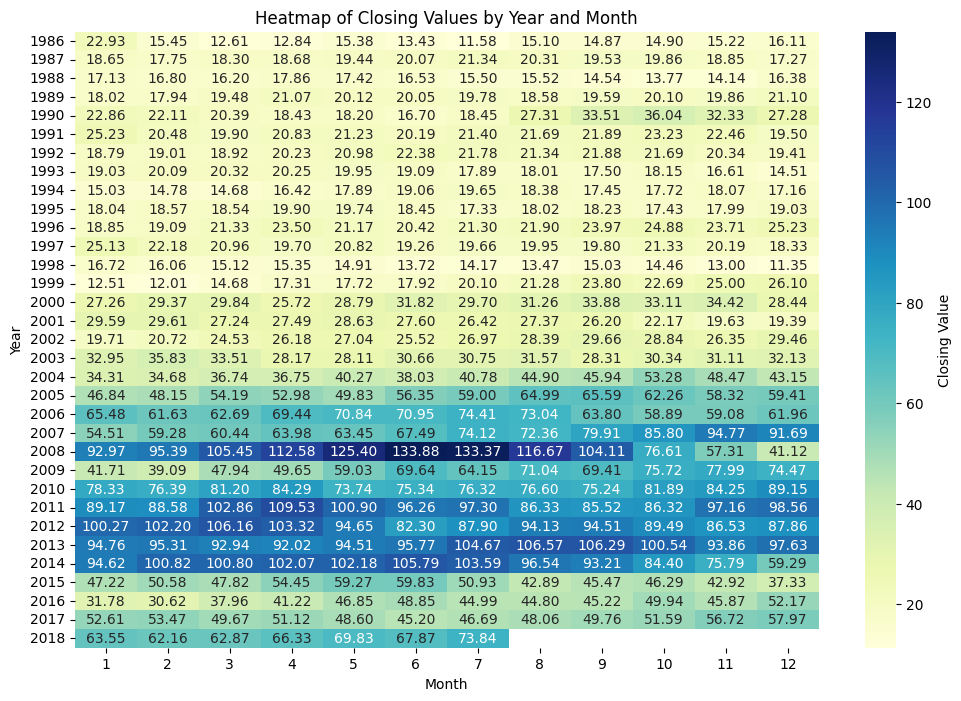

In [24]:
heatmap_data = df.pivot_table(index='Year', columns='Month', values='Closing Value', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Closing Value'})
plt.title('Heatmap of Closing Values by Year and Month')
plt.show()


## Yearly price change

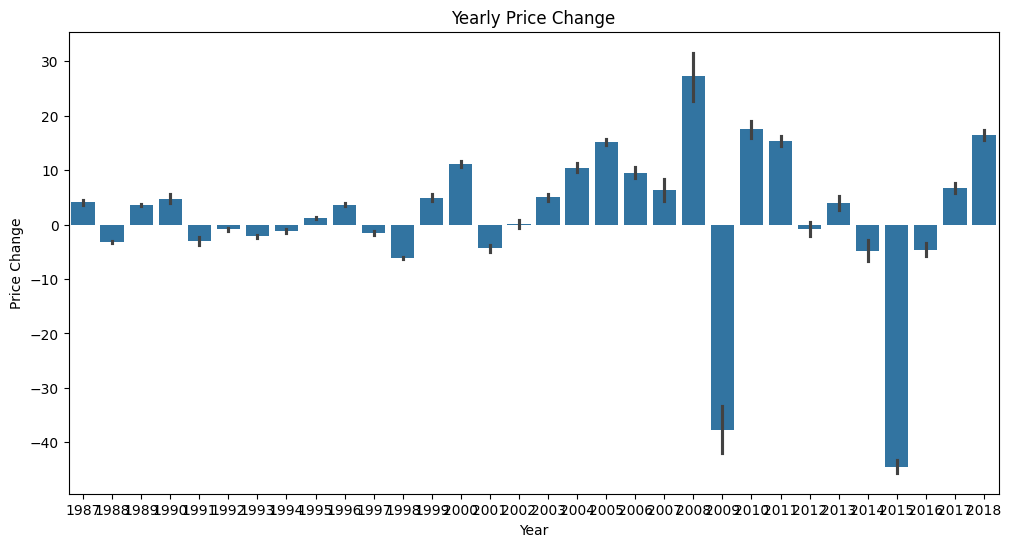

In [25]:
df['Yearly_Price_Change'] = df['Closing Value'].diff(252)  # Assuming 252 trading days in a year

# Drop rows with NaN values before plotting
df_cleaned = df.dropna(subset=['Yearly_Price_Change'])

# Plot the yearly price change
plt.figure(figsize=(12, 6))
sns.barplot(x=df_cleaned['Date'].dt.year, y=df_cleaned['Yearly_Price_Change'])
plt.title('Yearly Price Change')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.show()


## Yearly start and end prices

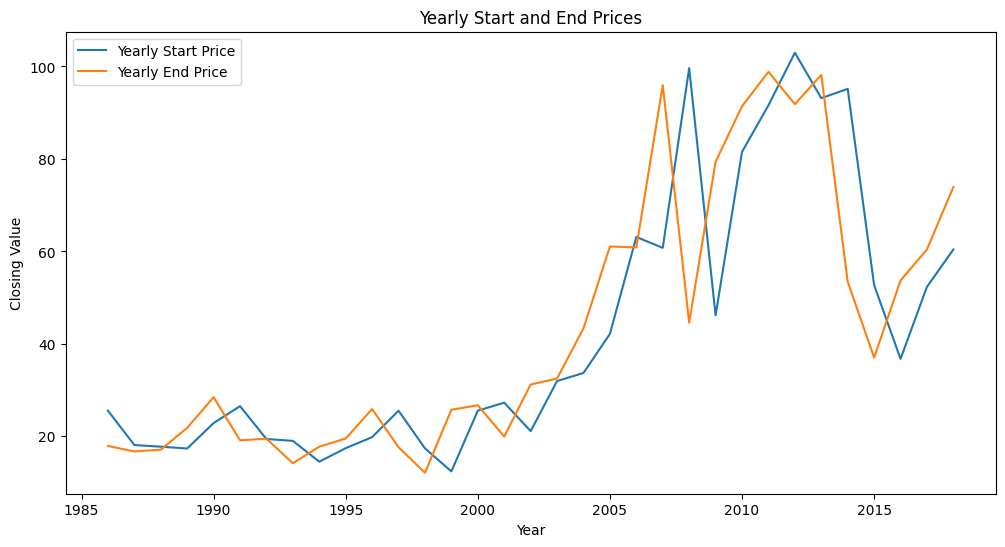

In [26]:
# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

yearly_start_price = df.groupby(df.index.year)['Closing Value'].first()
yearly_end_price = df.groupby(df.index.year)['Closing Value'].last()


plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_start_price.index, y=yearly_start_price.values, label='Yearly Start Price')
sns.lineplot(x=yearly_end_price.index, y=yearly_end_price.values, label='Yearly End Price')
plt.title('Yearly Start and End Prices')
plt.xlabel('Year')
plt.ylabel('Closing Value')
plt.legend()
plt.show()


## Cross-correlation with lagged variables

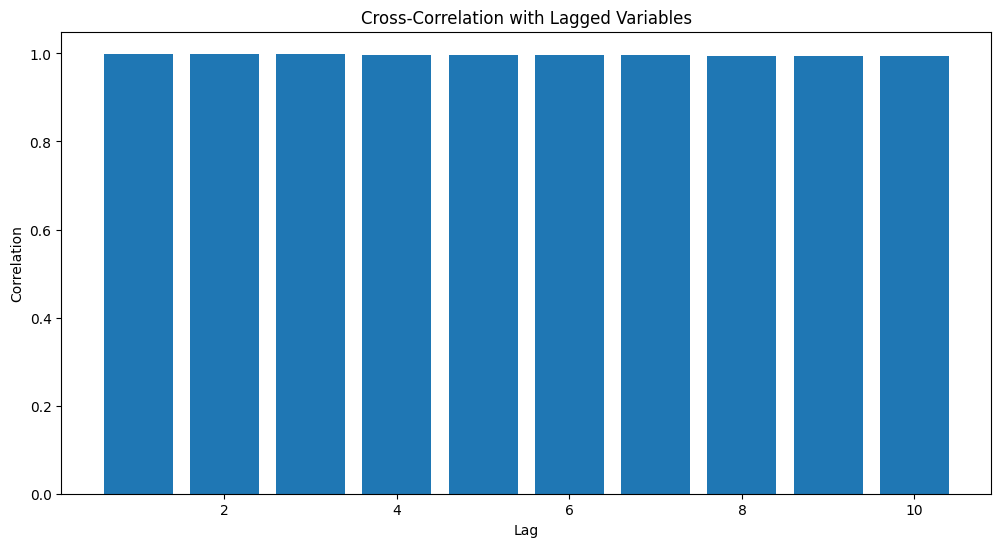

In [27]:
lag_values = range(1, 11)
correlation_with_lags = [df['Closing Value'].corr(df['Closing Value'].shift(i)) for i in lag_values]

# Plot cross-correlation
plt.figure(figsize=(12, 6))
plt.bar(lag_values, correlation_with_lags)
plt.title('Cross-Correlation with Lagged Variables')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()


## Distribution of price percentage changes

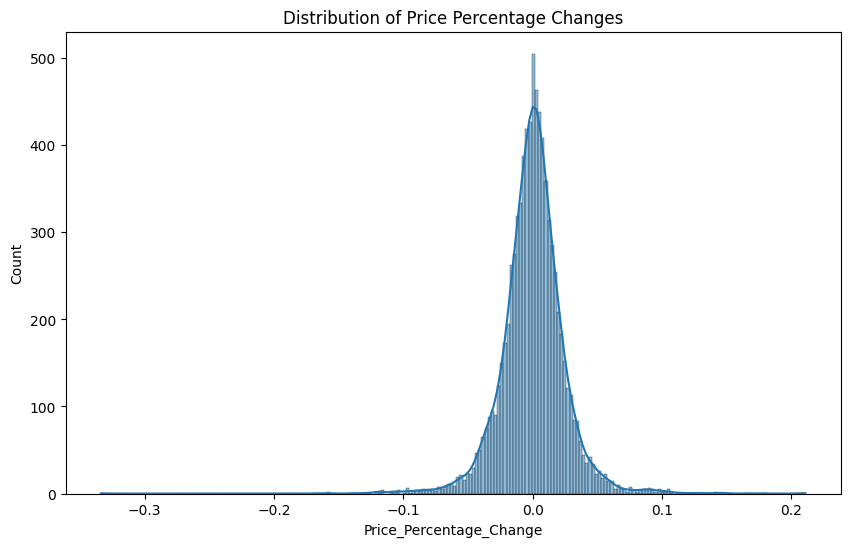

In [28]:
df['Price_Percentage_Change'] = df['Closing Value'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_Percentage_Change'].dropna(), kde=True)
plt.title('Distribution of Price Percentage Changes')
plt.show()


## Cross-sectional analysis by day of the week

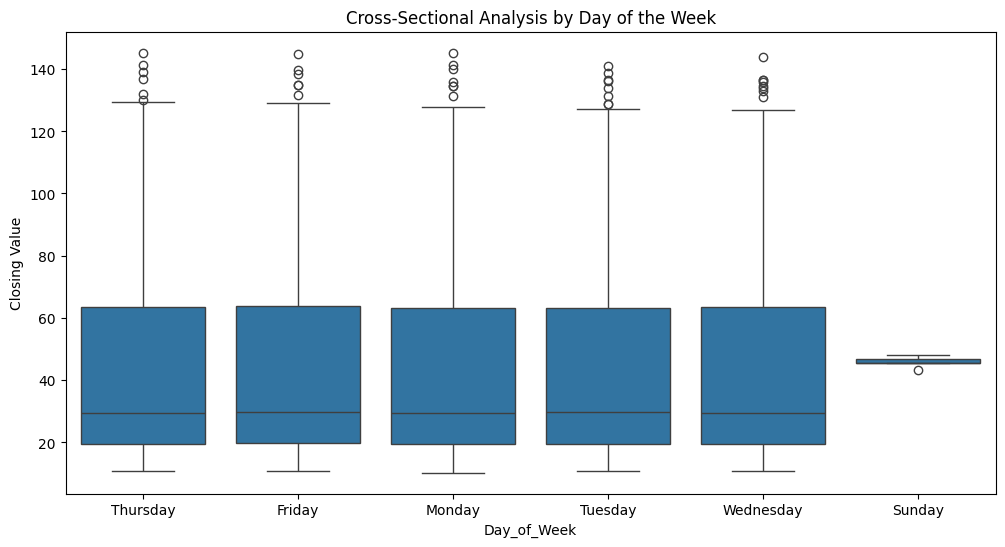

In [29]:
# Ensure 'Date' column is in datetime format and set it as the index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Cross-sectional analysis by day of the week
df['Day_of_Week'] = df.index.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_of_Week', y='Closing Value', data=df)
plt.title('Cross-Sectional Analysis by Day of the Week')
plt.show()


## Event Analysis

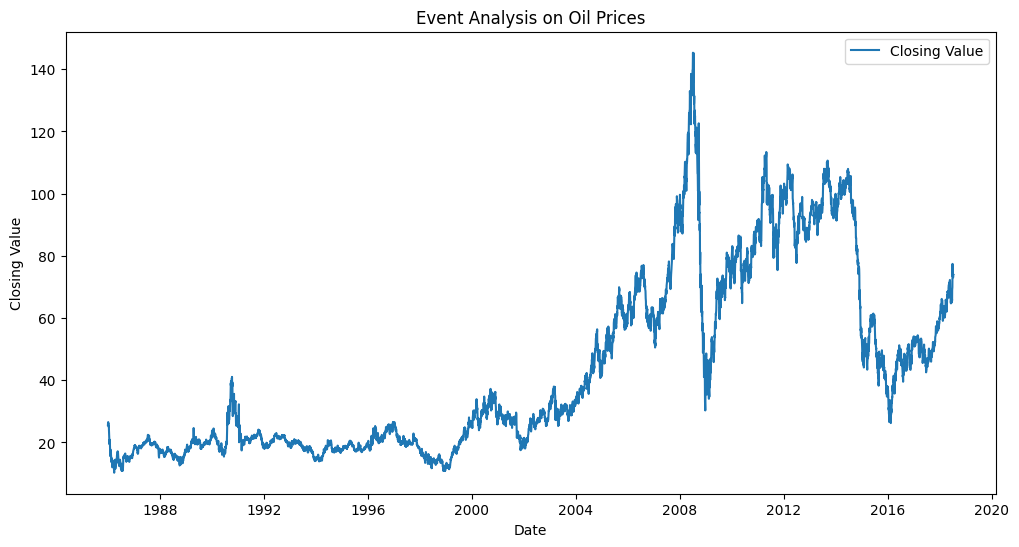

In [30]:
# Ensure 'Date' column is in datetime format and set it as the index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Highlight events on the closing value plot
events = {'2022-01-01': 'New Year', '2022-05-01': 'Labor Day', '2022-12-25': 'Christmas'}

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Closing Value', data=df, label='Closing Value')

# Highlight events on the plot
for date, event_name in events.items():
    event_date = pd.to_datetime(date)

    # Check if the event_date exists in the index
    if event_date in df.index:
        plt.scatter(event_date, df.loc[event_date, 'Closing Value'], color='red', label=event_name)

plt.title('Event Analysis on Oil Prices')
plt.legend()
plt.show()


In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Closing Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.00761209595606
p-value: 0.28324546674775164


**Here pvalue>0.05 so our data is not a stationary**

In [32]:
from statsmodels.tsa.arima_model import ARIMA    # ARIMA Modeling
from statsmodels.tsa.stattools import adfuller   # Augmented Dickey-Fuller Test for Checking Stationary
from statsmodels.tsa.stattools import acf, pacf  # Finding ARIMA parameters using Autocorrelation
from statsmodels.tsa.seasonal import seasonal_decompose # Decompose the ARIMA Forecast model

In [33]:
data=pd.read_excel('Crude Oil Prices.xlsx')

In [34]:
len(data)

8223

In [35]:
# Assuming 'Date' is another column that uniquely identifies rows
closing_values = data.loc[:, 'Closing Value']
# Assuming 'Closing Value' is at index 0
closing_values = data.iloc[:, 0]
closing_values = data.filter(like='Closing Value')
closing_values = data['Closing Value']
# Assuming df is your DataFrame
closing_values = data['Closing Value']
print(closing_values)



0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8218    74.19
8219      NaN
8220    73.05
8221    73.78
8222    73.93
Name: Closing Value, Length: 8223, dtype: float64


In [36]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [37]:
data = data.dropna()

In [38]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [39]:
df1 = data.iloc[:,1:2]
df1.columns

Index(['Closing Value'], dtype='object')

In [40]:
df1

,Closing Value
0,25.56
1,26.00
2,26.53
3,25.85
4,25.87
...,...
8217,73.89
8218,74.19
8220,73.05
8221,73.78


In [41]:
# Perform Augmented Dickey–Fuller test to check if the given Time series is stationary:
def test_stationarity(ts):

    #Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts['Closing Value'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


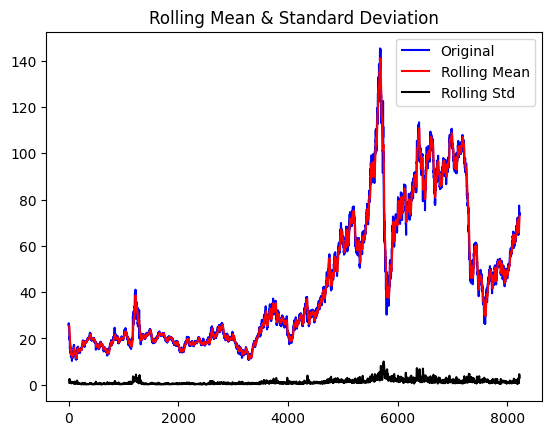

Results of Dickey-Fuller Test:
Test Statistic                   -2.012553
p-value                           0.281096
#Lags Used                       37.000000
Number of Observations Used    8178.000000
Critical Value (1%)              -3.431150
Critical Value (5%)              -2.861893
Critical Value (10%)             -2.566958
dtype: float64


In [42]:
test_stationarity(df1)

**This means that our time series data is NOT stationary.**

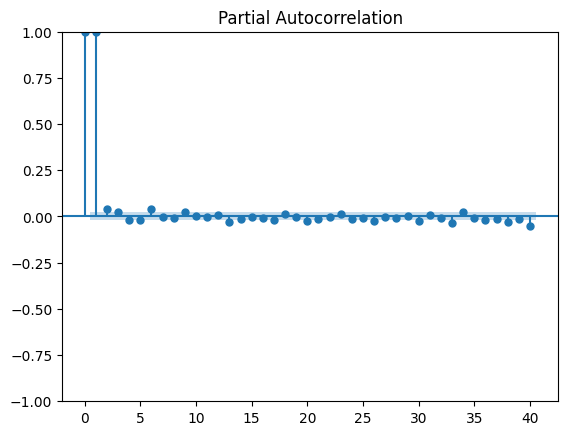

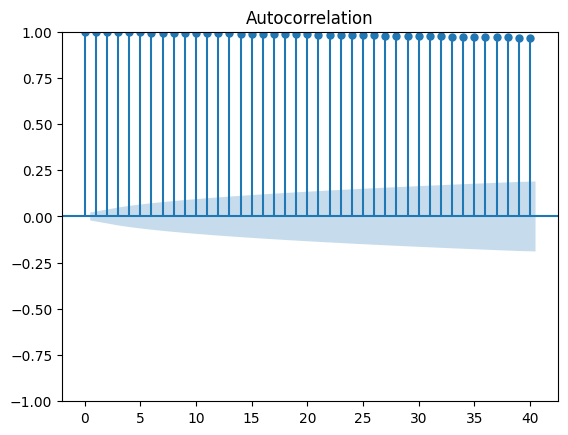

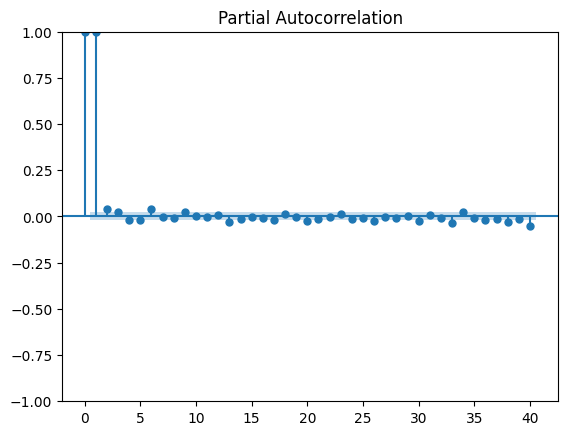

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))
plot_acf(df1['Closing Value'])
plot_pacf(df1['Closing Value'])

In [44]:
# Implementing own function to create ACF plot
def get_acf_plot(ts):
    #calling acf function from stattools
    y = ts['Closing Value']
    lag_acf = acf(y, nlags=500)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')

In [45]:
def get_pacf_plot(ts):
    #calling pacf function from stattools
    y =df1['Closing Value']
    lag_pacf = pacf(y, nlags=50)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')


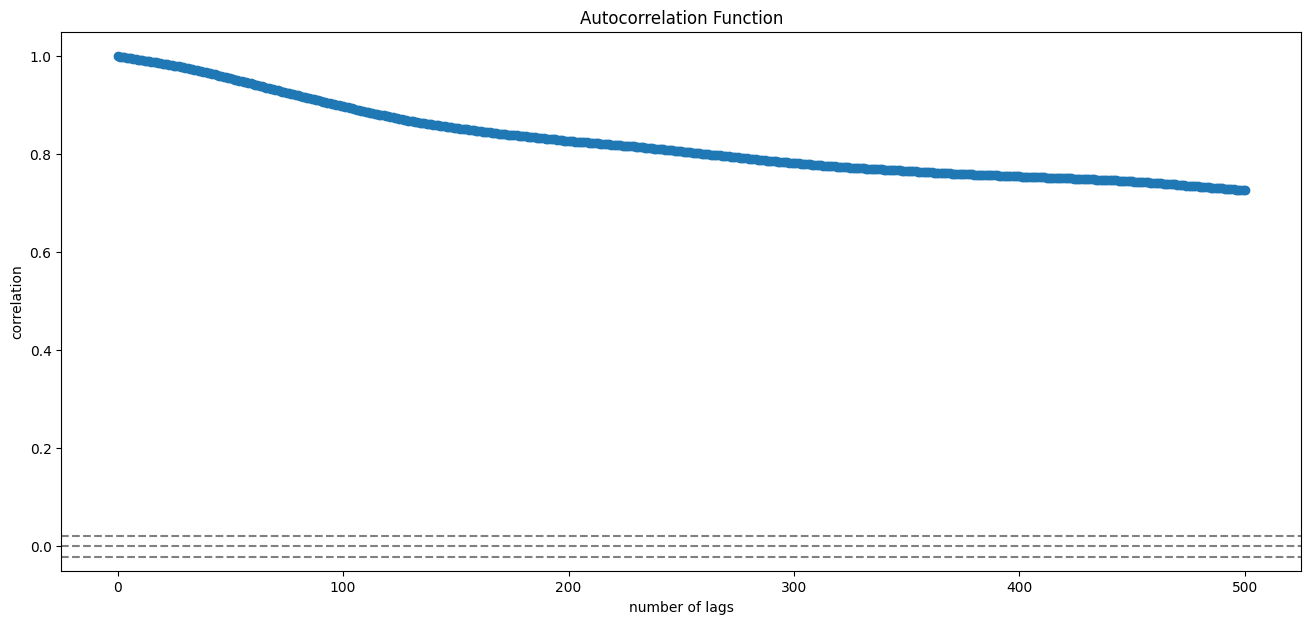

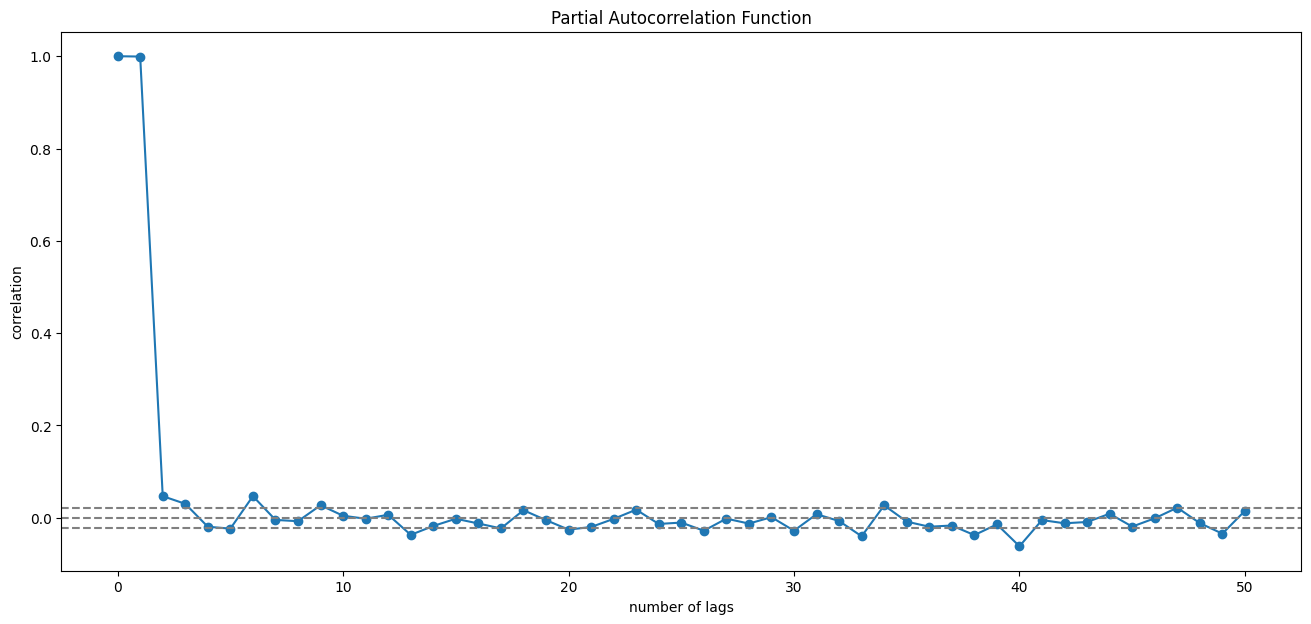

In [46]:
import numpy as np
get_acf_plot(df1)
get_pacf_plot(df1)

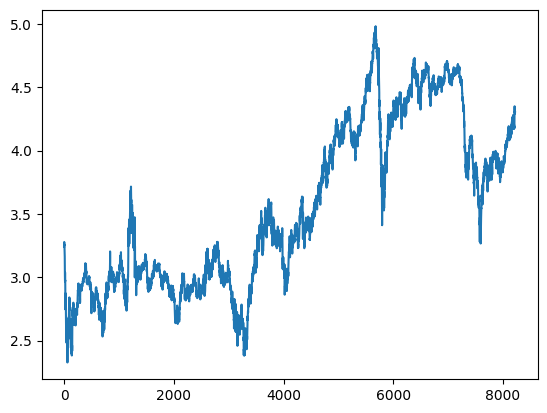

In [47]:
# Log Transformation
ts_log = np.log(df1)
plt.plot(ts_log)

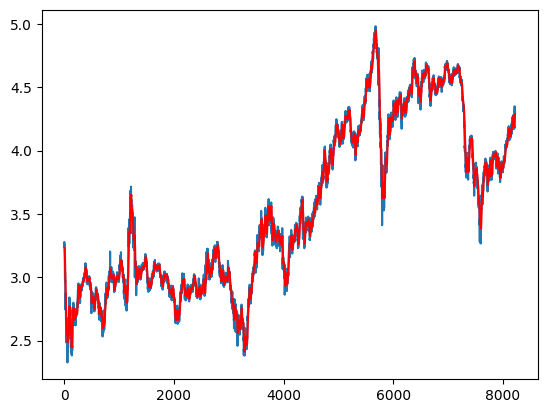

In [48]:
# Moving Average of last 12 values
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [49]:
# Differencing
ts_log_ma_diff = ts_log - moving_avg
ts_log_ma_diff.head(12)

,Closing Value
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [50]:
# Drop missing values
ts_log_ma_diff.dropna(inplace=True)



In [51]:
ts_log_ma_diff

,Closing Value
11,-0.070160
12,-0.157486
13,-0.172464
14,-0.167576
15,-0.161831
...,...
8217,0.055235
8218,0.048279
8220,0.024223
8221,0.023723


In [52]:
# Assuming 'Date' is another column that uniquely identifies rows
closing_values = data.loc[:, 'Closing Value']
# Assuming 'Closing Value' is at index 0
closing_values = data.iloc[:, 0]
closing_values = data.filter(like='Closing Value')
closing_values = data['Closing Value']
# Assuming df is your DataFrame
closing_values = data['Closing Value']
print(closing_values)




0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8217    73.89
8218    74.19
8220    73.05
8221    73.78
8222    73.93
Name: Closing Value, Length: 8216, dtype: float64


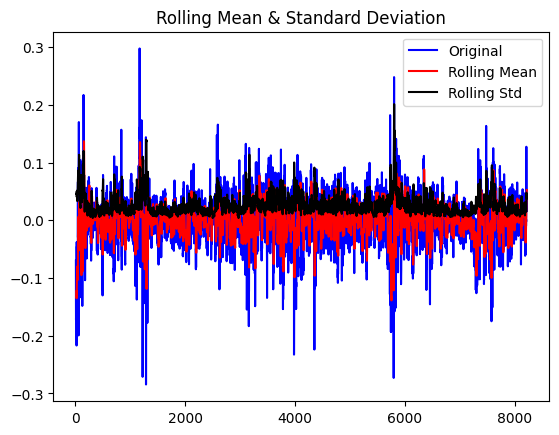

Results of Dickey-Fuller Test:
Test Statistic                -1.324720e+01
p-value                        8.924606e-25
#Lags Used                     3.400000e+01
Number of Observations Used    8.170000e+03
Critical Value (1%)           -3.431151e+00
Critical Value (5%)           -2.861894e+00
Critical Value (10%)          -2.566958e+00
dtype: float64


In [53]:

# Test stationarity
test_stationarity(ts_log_ma_diff)

In [54]:
# Check mean and standard deviation of the scaled data
print("Mean of scaled training data:", np.mean(ts_log_ma_diff))
print("Standard deviation of scaled training data:", np.std(ts_log_ma_diff))

Mean of scaled training data: Closing Value    0.00072
dtype: float64
Standard deviation of scaled training data: Closing Value    0.043302
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



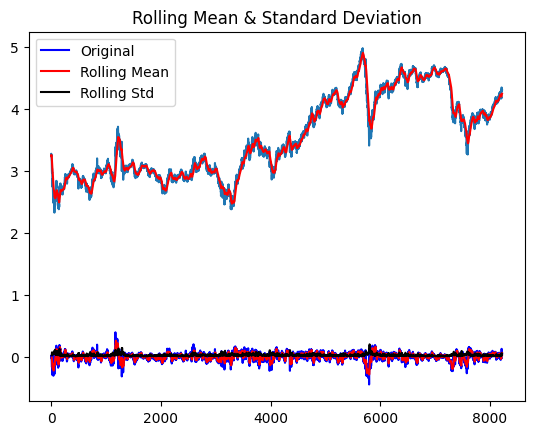

Results of Dickey-Fuller Test:
Test Statistic                -1.276263e+01
p-value                        8.082158e-24
#Lags Used                     8.000000e+00
Number of Observations Used    8.207000e+03
Critical Value (1%)           -3.431147e+00
Critical Value (5%)           -2.861892e+00
Critical Value (10%)          -2.566957e+00
dtype: float64


In [55]:
# Exponentially weighted moving average
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [56]:
# Check mean and standard deviation of the scaled data
print("Mean of scaled training data:", np.mean(ts_log_ewma_diff))
print("Standard deviation of scaled training data:", np.std(ts_log_ewma_diff))

Mean of scaled training data: Closing Value    0.002314
dtype: float64
Standard deviation of scaled training data: Closing Value    0.065191
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



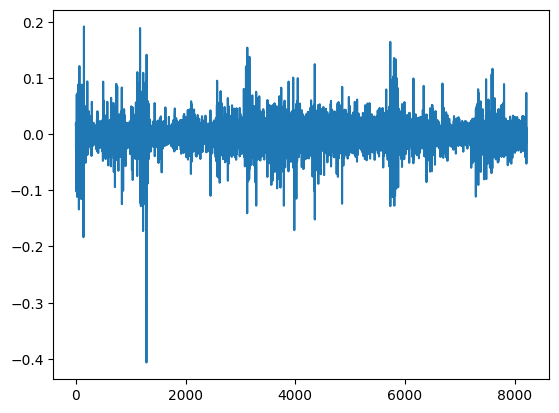

In [57]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

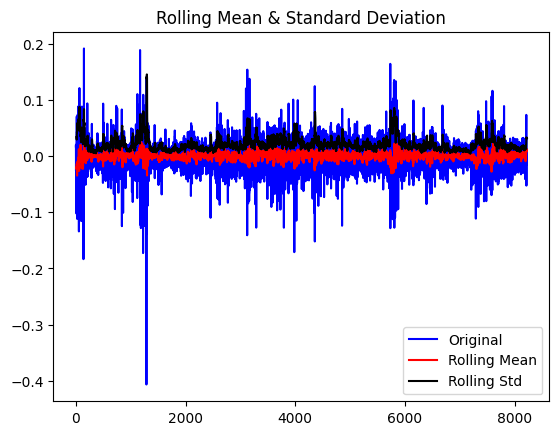

Results of Dickey-Fuller Test:
Test Statistic                  -35.567905
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    8207.000000
Critical Value (1%)              -3.431147
Critical Value (5%)              -2.861892
Critical Value (10%)             -2.566957
dtype: float64


In [58]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [59]:
# Check mean and standard deviation of the scaled data
print("Mean of scaled training data:", np.mean(ts_log_diff))
print("Standard deviation of scaled training data:", np.std(ts_log_diff))

Mean of scaled training data: Closing Value    0.000129
dtype: float64
Standard deviation of scaled training data: Closing Value    0.025047
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



**Standardize the data**

In [61]:
# Generate synthetic data
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100) * 2


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
import sklearn.model_selection

In [65]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [66]:
result_std = adfuller(X_test_scaled, autolag='AIC')

In [67]:
# to check p value
test_statistic, p_value, _, _, critical_values, _ = result_std
print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')
print(f'Critical Values: {critical_values}')

Test Statistic: -3.971022905220832
P-value: 0.0015700803279737469
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


In [68]:
# Interpret the results
if p_value <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis).')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis).')


The time series is likely stationary (reject the null hypothesis).


In [69]:
# Check mean and standard deviation of the scaled data
print("Mean of scaled training data:", np.mean(X_train_scaled))
print("Standard deviation of scaled training data:", np.std(X_train_scaled))

Mean of scaled training data: -8.881784197001253e-17
Standard deviation of scaled training data: 1.0


# **MODEL BUILDING**

**Train a simple model (Random Forest Regressor)**

In [70]:
import sklearn.ensemble

model = sklearn.ensemble.RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [71]:
# Make predictions on the test set
predictions_rf= model.predict(X_test)

In [72]:
import sklearn.metrics

r2_rf = sklearn.metrics.r2_score(y_test, predictions_rf)

In [73]:
import sklearn.metrics

# Evaluate the model
mae = sklearn.metrics.mean_absolute_error(y_test, predictions_rf)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.3502760194229118


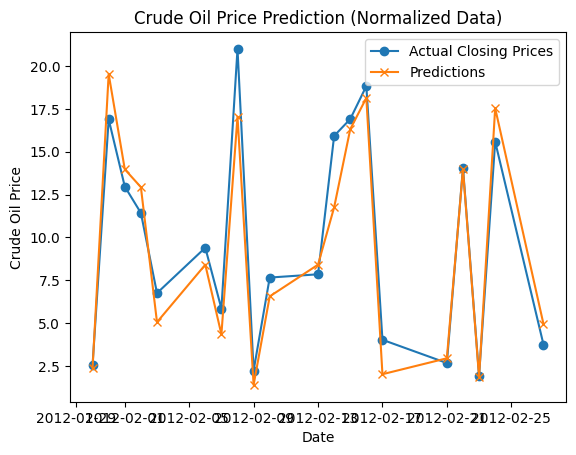

In [74]:
# Visualize predictions
plt.plot(test.index[:len(predictions_rf)], y_test, label='Actual Closing Prices', marker='o')
plt.plot(test.index[:len(predictions_rf)], predictions_rf, label='Predictions', marker='x')

#plt.plot(test.index, predictions_rf, label='Predicted Prices', marker='x')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Prediction (Normalized Data)')
plt.legend()
plt.show()

**Train the Linear Regression model**

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Make predictions on the test set
predictions_linear = linear_model.predict(X_test)


In [77]:
# Evaluate the Linear Regression model
mae_linear = mean_absolute_error(y_test, predictions_linear)
mse_linear = mean_squared_error(y_test, predictions_linear)

In [78]:
import sklearn.metrics

r2_linear = sklearn.metrics.r2_score(y_test, predictions_linear)

In [79]:
print(f'Linear Regression - Mean Absolute Error: {mae_linear}, Mean Squared Error: {mse_linear}')


Linear Regression - Mean Absolute Error: 1.1826851558379552, Mean Squared Error: 2.6147980548680088


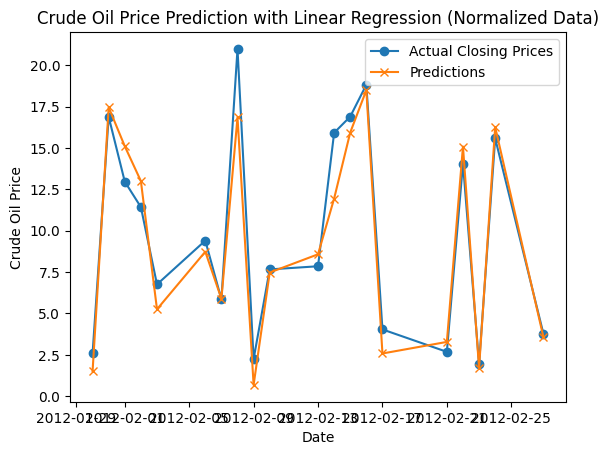

In [80]:
# Visualize predictions
plt.plot(test.index[:len(predictions_linear)], y_test, label='Actual Closing Prices', marker='o')
plt.plot(test.index[:len(predictions_linear)], predictions_linear, label='Predictions', marker='x')

plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Prediction with Linear Regression (Normalized Data)')
plt.legend()
plt.show()

# **SVR MODEL**

In [81]:
import sklearn.svm
svr_model = sklearn.svm.SVR()
svr_model.fit(X_train, y_train)

SVR()

In [82]:
# Make predictions on the test set
predictions_svr = svr_model.predict(X_test)

In [83]:
# Evaluate the SVR model
import sklearn.metrics
mae_svr = mean_absolute_error(y_test, predictions_svr)
mse_svr = mean_squared_error(y_test, predictions_svr)


In [84]:
print(f"SVR - Mean Absolute Error: {mae_svr}, Mean Squared Error: {mse_svr}")

SVR - Mean Absolute Error: 1.2549335034196767, Mean Squared Error: 2.979162692128477


In [85]:
import sklearn.metrics

r2_svr= sklearn.metrics.r2_score(y_test, predictions_svr)

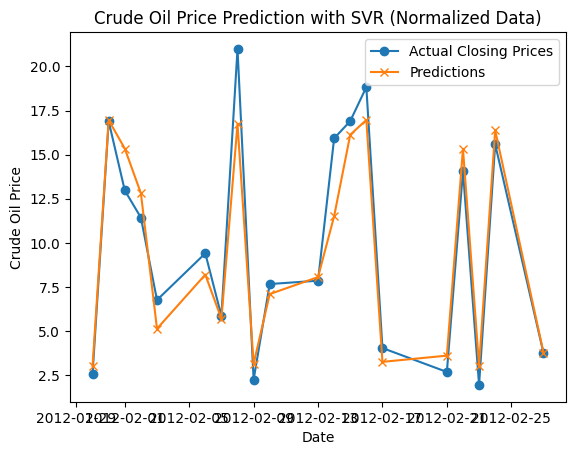

In [86]:
# Visualize predictions
plt.plot(test.index[:len(predictions_svr)], y_test, label='Actual Closing Prices', marker='o')
plt.plot(test.index[:len(predictions_svr)], predictions_svr, label='Predictions', marker='x')

plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Prediction with SVR (Normalized Data)')
plt.legend()
plt.show()

In [87]:
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf =  sklearn.metrics.r2_score(y_test, predictions_rf)

mae_linear = mean_absolute_error(y_test, predictions_linear)
mse_linear = mean_squared_error(y_test, predictions_linear)
r2_linear =  sklearn.metrics.r2_score(y_test, predictions_linear)

mae_svr = mean_absolute_error(y_test, predictions_svr)
mse_svr = mean_squared_error(y_test, predictions_svr)
r2_svr = sklearn.metrics. r2_score(y_test, predictions_svr)

In [88]:
# Print the evaluation metrics
print("Random Forest - MAE:", mae_rf, "MSE:", mse_rf, "R-squared:", r2_rf)
print("Linear Regression - MAE:", mae_linear, "MSE:", mse_linear, "R-squared:", r2_linear)
print("SVR - MAE:", mae_svr, "MSE:", mse_svr, "R-squared:", r2_svr)

Random Forest - MAE: 1.3502760194229118 MSE: 3.0865046006139756 R-squared: 0.9158728040028248
Linear Regression - MAE: 1.1826851558379552 MSE: 2.6147980548680088 R-squared: 0.9287298556395622
SVR - MAE: 1.2549335034196767 MSE: 2.979162692128477 R-squared: 0.9187985646746456


**LSTM MODEL**

In [89]:
# Extract the 'Price' column and normalize it
prices = data['Closing Value'].values.reshape(-1, 1)
#scaler = MinMaxScaler(feature_range=(0, 1))
#prices_scaled = scaler.fit_transform(prices)
scaler = StandardScaler()
prices_scaled = scaler.fit_transform(prices)
#X_test_scaled = scaler.transform(X_test)


In [90]:
# Create sequences for the LSTM model
sequence_length = 10  # You can adjust this parameter
X, y = [], []
for i in range(len(prices_scaled) - sequence_length):
    X.append(prices_scaled[i:i+sequence_length, 0])
    y.append(prices_scaled[i+sequence_length, 0])

In [91]:
X, y = np.array(X), np.array(y)

In [92]:
# Reshape data for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [93]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [136]:
# Build the LSTM model
model_lstm= Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [137]:
# Train the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
206/206 [==============================] - 4s 6ms/step - loss: 0.0322
Epoch 2/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0056
Epoch 3/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0052
Epoch 4/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0047
Epoch 5/50
206/206 [==============================] - 1s 7ms/step - loss: 0.0040
Epoch 6/50
206/206 [==============================] - 2s 8ms/step - loss: 0.0039
Epoch 7/50
206/206 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 8/50
206/206 [==============================] - 2s 12ms/step - loss: 0.0032
Epoch 9/50
206/206 [==============================] - 2s 12ms/step - loss: 0.0029
Epoch 10/50
206/206 [==============================] - 2s 10ms/step - loss: 0.0026
Epoch 11/50
206/206 [==============================] - 3s 12ms/step - loss: 0.0026
Epoch 12/50
206/206 [==============================] - 2s 10ms/step - loss: 0.0024
Epoch 13/50
206/206 

In [138]:

# Make predictions on the test set
predictions_lstm = model_lstm.predict(X_test)

52/52 [==============================] - 1s 2ms/step


In [139]:
# Inverse transform the predictions to the original scale
predictions_inverse = scaler.inverse_transform(predictions_lstm.reshape(-1, 1))


**Mean Squared Error (MSE):**

In [140]:
mse_lstm= mean_squared_error(y_test, predictions_lstm)
mse_lstm

0.0021099692109631334

**Root Mean Squared Error (RMSE):**

In [141]:
rmse_lstm = np.sqrt(mse_lstm)
rmse_lstm

0.045934401171269595

**Mean Absolute Error (MAE):**

In [142]:
mae_lstm = mean_absolute_error(y_test, predictions_lstm)
mae_lstm


0.035771649851675955

**R-squared (R2):**

In [143]:
r2_lstm=  sklearn.metrics.r2_score(y_test, predictions_lstm)
r2_lstm


0.9968166048743149

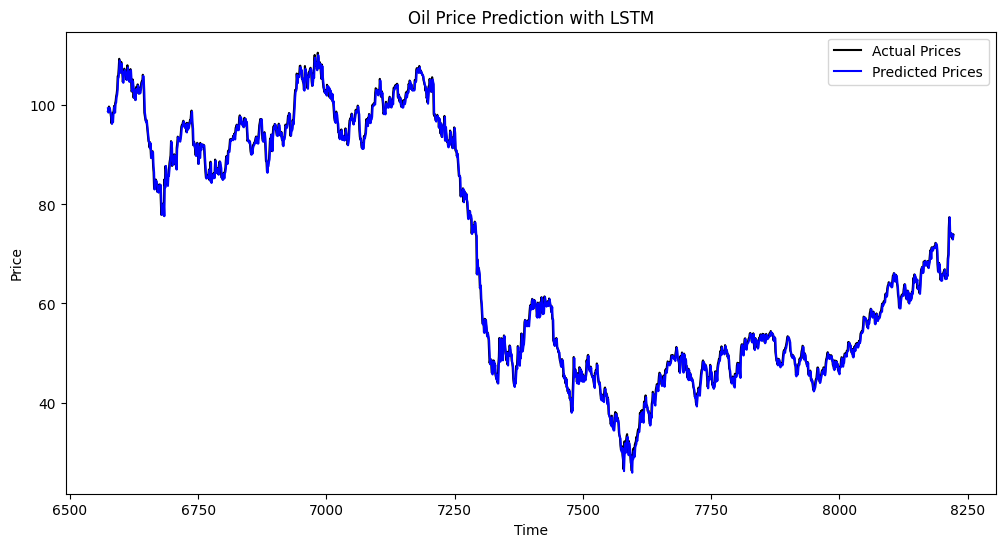

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + sequence_length:], prices[train_size + sequence_length:], label='Actual Prices', color='black')
plt.plot(data.index[train_size + sequence_length:], predictions_inverse, label='Predicted Prices', color='blue')
plt.title('Oil Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [144]:
# Print the evaluation metrics
print("Random Forest - MAE:", mae_rf, "MSE:", mse_rf, "R-squared:", r2_rf)
print("Linear Regression - MAE:", mae_linear, "MSE:", mse_linear, "R-squared:", r2_linear)
print("SVR - MAE:", mae_svr, "MSE:", mse_svr, "R-squared:", r2_svr)
print("LSTM-MAE", mae_lstm, "MSE:", mse_lstm, "R-squared:", r2_lstm)


Random Forest - MAE: 1.3502760194229118 MSE: 3.0865046006139756 R-squared: 0.9158728040028248
Linear Regression - MAE: 1.1826851558379552 MSE: 2.6147980548680088 R-squared: 0.9287298556395622
SVR - MAE: 1.2549335034196767 MSE: 2.979162692128477 R-squared: 0.9187985646746456
LSTM-MAE 0.035771649851675955 MSE: 0.0021099692109631334 R-squared: 0.9968166048743149


# **PROPHET MODEL**

In [105]:
!pip install pystan
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.4 MB/s eta 0:00:00


In [106]:
!pip install prophet

In [107]:
from prophet import Prophet

In [108]:
data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8217,2018-07-02,73.89
8218,2018-07-03,74.19
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [109]:
#data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns={'Date': 'ds', 'Closing Value': 'y'}, inplace=True)


In [110]:
data

,ds,y
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8217,2018-07-02,73.89
8218,2018-07-03,74.19
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [111]:
data = data.dropna()


In [112]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [113]:
# Fit Prophet model
model = Prophet()
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gca5jg4/_68xnb_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gca5jg4/pvf8z1ij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86126', 'data', 'file=/tmp/tmp5gca5jg4/_68xnb_6.json', 'init=/tmp/tmp5gca5jg4/pvf8z1ij.json', 'output', 'file=/tmp/tmp5gca5jg4/prophet_modelc8la13nn/prophet_model-20240309064832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:48:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [114]:
# Make future dataframe for predictions
future = model.make_future_dataframe(periods=365)

In [115]:
# Make predictions
forecast = model.predict(future)

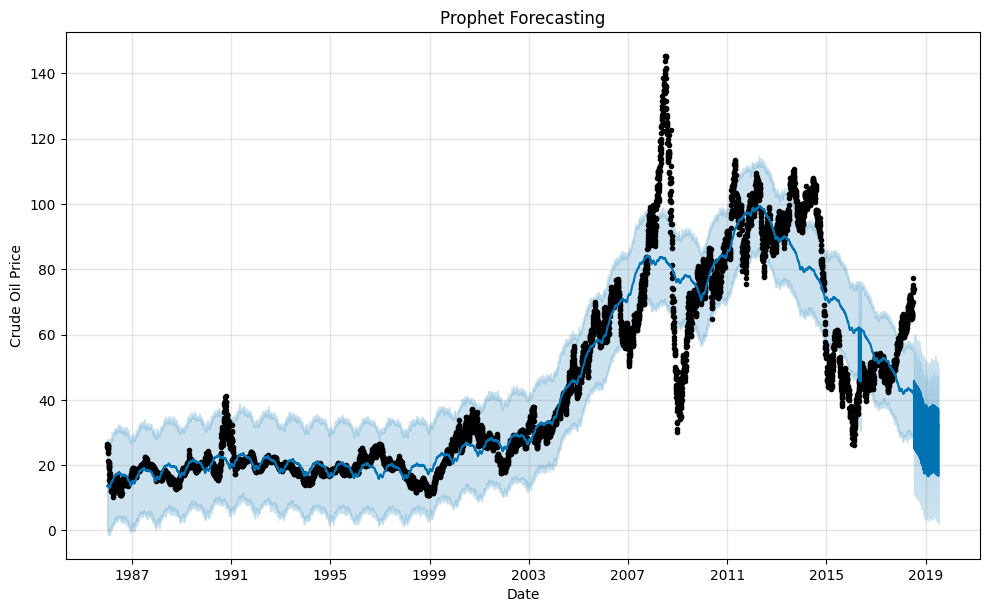

In [116]:
# Visualize the results
fig = model.plot(forecast)
plt.title('Prophet Forecasting')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.show()

In [117]:
# Extract the relevant portion of the forecast for the training data
forecast_train = forecast[['ds', 'yhat']][:len(data)]


In [118]:
# Calculate mean squared error
mse_prophet = mean_squared_error(data['y'], forecast_train['yhat'])
print(f'Mean Squared Error (Prophet): {mse_prophet}')

Mean Squared Error (Prophet): 113.84581561100306


In [119]:
# Calculate R-squared
r2_prophet =sklearn.metrics.r2_score(data['y'], forecast_train['yhat'])
print(f'R-squared (Prophet): {r2_prophet}')


R-squared (Prophet): 0.8701943622614396


In [120]:
# Calculate Mean Absolute Error (MAE) for accuracy
mae_prophet = mean_absolute_error(data['y'], forecast_train['yhat'])
print(f'Mean Absolute Error (Prophet): {mae_prophet}')


Mean Absolute Error (Prophet): 6.732695611220998


In [121]:
# Calculate Root Mean Squared Error (RMSE)
rmse_prophet = np.sqrt(mean_squared_error(data['y'], forecast_train['yhat']))
print(f'Root Mean Squared Error (Prophet): {rmse_prophet}')

Root Mean Squared Error (Prophet): 10.669855463454182


# **ARIMA MODEL**

In [122]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00


In [123]:
# Assuming you have split your data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [124]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [125]:
import statsmodels.api as sm

In [126]:
!pip install statsmodels
import statsmodels.tsa.arima.model as smt

In [127]:
data

,ds,y
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8217,2018-07-02,73.89
8218,2018-07-03,74.19
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [128]:
# Split into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
# Define ARIMA order
p = 1 # Autoregressive order
d = 0 # Differencing order
q = 1 # Moving average order


# Fit ARIMA model on training data
order = (p, d, q)  # replace p, d, q with the order of your ARIMA model
model = smt.ARIMA(test['y'], order=order,)
fit_model = model.fit()

# Make predictions on the test set
predictions_arima = fit_model.predict(start=len(train), end=len(train) + len(test) - 1)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [129]:
# Calculate Mean Absolute Error
mae_arima= mean_absolute_error(test['y'], predictions_arima)
print(f'Mean Absolute Error (MAE) arima: {mae_arima}')

Mean Absolute Error (MAE) arima: 22.481423031670897


In [130]:
# Calculate mean squared error
mse_arima = mean_squared_error(test['y'], predictions_arima)
print(f'Mean Squared Error (arima): {mse_arima}')

Mean Squared Error (arima): 581.5626378903095


In [131]:
# Calculate R-squared
r2_arima =sklearn.metrics.r2_score(test['y'],predictions_arima )
print(f'R-squared (arima): {r2_arima}')

R-squared (arima): 2.8243373374703395e-05


In [132]:
# Calculate Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mean_squared_error(test['y'],predictions_arima))
print(f'Root Mean Squared Error (Prophet): {rmse_arima}')

Root Mean Squared Error (Prophet): 24.115609838656567


In [133]:
print("Random Forest - MAE:", mae_rf, "MSE:", mse_rf, "R-squared:", r2_rf)
print("Linear Regression - MAE:", mae_linear, "MSE:", mse_linear, "R-squared:", r2_linear)
print("SVR - MAE:", mae_svr, "MSE:", mse_svr, "R-squared:", r2_svr)

Random Forest - MAE: 1.3502760194229118 MSE: 3.0865046006139756 R-squared: 0.9158728040028248
Linear Regression - MAE: 1.1826851558379552 MSE: 2.6147980548680088 R-squared: 0.9287298556395622
SVR - MAE: 1.2549335034196767 MSE: 2.979162692128477 R-squared: 0.9187985646746456


In [134]:
print("prophet - MAE:", mae_prophet, "MSE:", mse_prophet, "R-squared:", r2_prophet)
print("ARIMA - MAE:", mae_arima, "MSE:", mse_arima, "R-squared:", r2_arima)

print("LSTM-MAE", mae_lstm, "MSE:", mse_lstm, "R-squared:", r2_lstm)

prophet - MAE: 6.732695611220998 MSE: 113.84581561100306 R-squared: 0.8701943622614396
ARIMA - MAE: 22.481423031670897 MSE: 581.5626378903095 R-squared: 2.8243373374703395e-05
LSTM-MAE 0.03198967891968896 MSE: 0.0017851867590968492 R-squared: 0.9973066171781946


**Compare  to all models LSTM model is better to predictions**